## Week 9 - Univariate and Bivariate Exploration of Data

In [2]:
# import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [3]:
# read in the data into a pandas dataframe
df = pd.read_csv('fuel-econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Data Wrangling (Assessing & Cleaning)

In [3]:
# check the datatypes
df.dtypes

id             int64
make          object
model         object
year           int64
VClass        object
drive         object
trans         object
fuelType      object
cylinders      int64
displ        float64
pv2            int64
pv4            int64
city         float64
UCity        float64
highway      float64
UHighway     float64
comb         float64
co2            int64
feScore        int64
ghgScore       int64
dtype: object

In [5]:
df.VClass.unique()

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

The vclass should have a categorical datatype but is currently seen as a string. We'll change that first.

In [6]:
# define the order of the ordinal variable
vclass_type = pd.api.types.CategoricalDtype(categories=['Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars'], ordered=True)
# change the datatype
df.VClass = df.VClass.astype(vclass_type)
# confirm the datatype is now okay
df.dtypes

id              int64
make           object
model          object
year            int64
VClass       category
drive          object
trans          object
fuelType       object
cylinders       int64
displ         float64
pv2             int64
pv4             int64
city          float64
UCity         float64
highway       float64
UHighway      float64
comb          float64
co2             int64
feScore         int64
ghgScore        int64
dtype: object

In [7]:
# check for null values
df.isnull().sum()

id           0
make         0
model        0
year         0
VClass       0
drive        0
trans        0
fuelType     0
cylinders    0
displ        0
pv2          0
pv4          0
city         0
UCity        0
highway      0
UHighway     0
comb         0
co2          0
feScore      0
ghgScore     0
dtype: int64

In [8]:
df.sample(20)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
2206,36461,Buick,Regal,2016,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,98,19.4394,24.5000,30.4124,43.6000,23.2074,381,5,5
621,33432,Nissan,GT-R,2014,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4644,20.2688,22.5041,30.1556,18.7260,472,4,4
3668,39282,Porsche,911 Turbo Cabriolet,2018,Minicompact Cars,All-Wheel Drive,Automatic (AM-S7),Premium Gasoline,6,3.8,68,0,18.6000,23.3000,23.8000,33.3000,20.5915,430,4,4
371,32958,Audi,S7,2013,Midsize Cars,All-Wheel Drive,Automatic (AM-S7),Premium Gasoline,8,4.0,0,0,16.7610,20.7539,26.9697,35.3350,20.2022,440,5,5
3349,38678,Lexus,LC 500,2018,Subcompact Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,8,5.0,86,0,16.0021,19.8644,25.6211,36.1196,19.2552,459,3,3
2881,37826,Kia,Optima Hybrid,2017,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,105,39.0875,53.9804,45.9447,62.7724,41.9017,212,9,9
1847,35765,Ford,C-MAX Energi Plug-in Hybrid,2015,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,2.0,0,100,40.4488,55.0000,36.2655,51.4000,38.4528,129,10,10
597,33350,Jaguar,XJ,2013,Large Cars,Rear-Wheel Drive,Automatic (S8),Premium Gasoline,6,3.0,0,102,17.9691,22.5000,26.7761,37.9000,21.0908,423,5,5
3893,39758,Kia,Cadenza,2018,Large Cars,Front-Wheel Drive,Automatic (S8),Regular Gasoline,6,3.3,0,108,20.3289,25.7228,27.5829,39.1521,23.0577,383,5,5
2507,37029,Mercedes-Benz,AMG CLA45 4matic,2016,Compact Cars,4-Wheel Drive,Automatic (AM7),Premium Gasoline,4,2.0,88,0,22.8912,29.3000,30.1602,43.2000,25.6759,348,6,6


The `pv2` and `pv4` seem to be the same variable spread across multiple columns. This is a tidiness issue and should be cleaned. However, since this isn't the focus of this exercise, it will be overlooked

### Univariate Analysis
The goal of univariate analysis is to explore the distribution of individual variables
* **Categorical Variables**
    * bar charts
    * pie/donut charts
* **Numerical Variables**
    * histograms
    * box plots

#### Categorical Ordinal Variables - VClass
Ordinal variables should be arranged with their inherent order

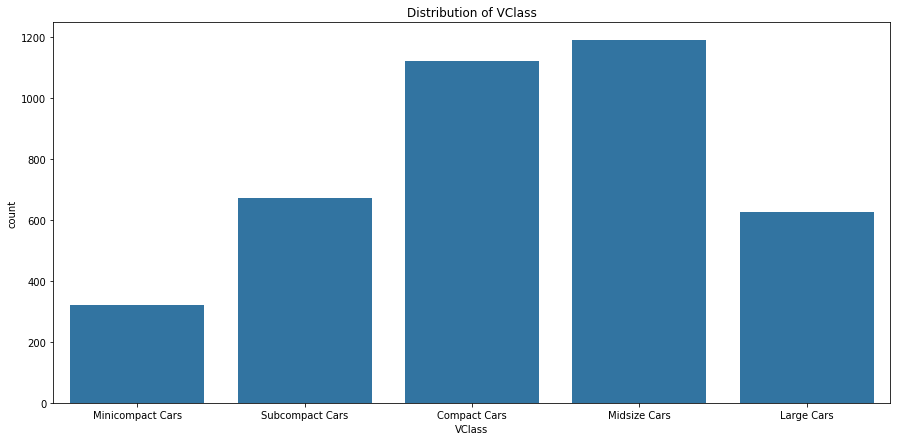

In [13]:
# exploring the distribution of VClass

# set the base color to avoid making noise with numerous color
base_color = sb.color_palette()[0]
# change the figure size
plt.figure(figsize=(15,7))
# use seaborn's countplot to plot a bargraph
sb.countplot(data=df, x='VClass', color=base_color)
plt.title('Distribution of VClass');

Most cars in this dataset are Midsize cars. A good number of them are also Compact cars.

#### Categorical Nominal Variables - make
Nominal variables should be arranged in the order of the highest frequency

In [16]:
# exploring the distribution of make

# arrange the categories in the order of highest frequency
make_freq = df.make.value_counts()
make_freq

BMW                  523
Mercedes-Benz        269
Porsche              235
Ford                 218
Chevrolet            212
MINI                 201
Audi                 201
Volkswagen           174
Hyundai              158
Dodge                140
Lexus                125
Kia                  124
Cadillac             118
Toyota               116
Infiniti             108
Honda                101
Jaguar                98
Mazda                 87
Nissan                71
Buick                 66
Subaru                60
Chrysler              58
Lincoln               52
Volvo                 50
Acura                 46
Bentley               45
Mitsubishi            44
Rolls-Royce           42
Maserati              39
Scion                 27
Fiat                  26
Ferrari               23
Genesis               17
Aston Martin          15
Suzuki                13
Roush Performance     10
Lotus                 10
Alfa Romeo             6
Karma                  1
Name: make, dtype: int64

Since there are so many catgories, a horizontal bar chart will be appropriate here.

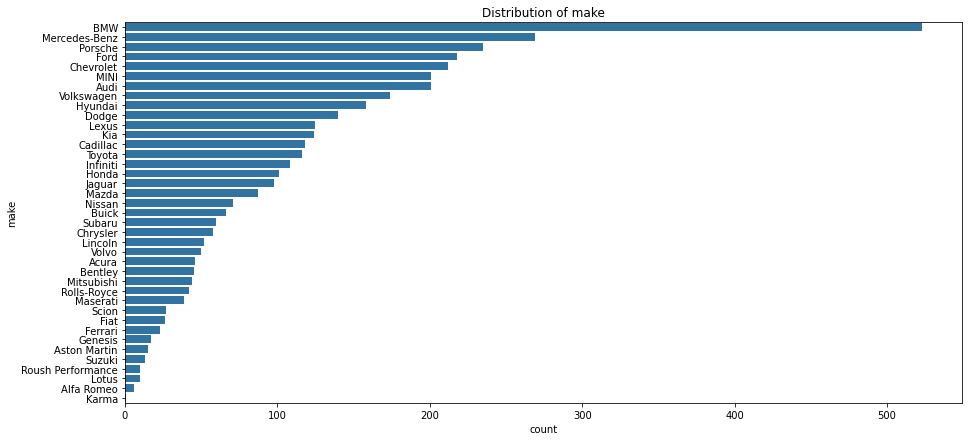

In [17]:
# change the figure size
plt.figure(figsize=(15,7))
# use seaborn's countplot to plot a bargraph
sb.countplot(data=df, y='make', color=base_color, order=make_freq.index)
plt.title('Distribution of make');

Most of the cars in this dataset seem to be luxury cars because BMW, Benz and Porsche top the list.

#### Numerical Continuous Variables - city
To get a good view of the distribution, we will explore different bin sizes. We'll plot them side by side using subplots.

In [22]:
df.city.describe()

count    3929.000000
mean       21.830462
std         6.246273
min        10.540200
25%        17.746900
50%        20.823200
75%        24.981400
max        57.808800
Name: city, dtype: float64

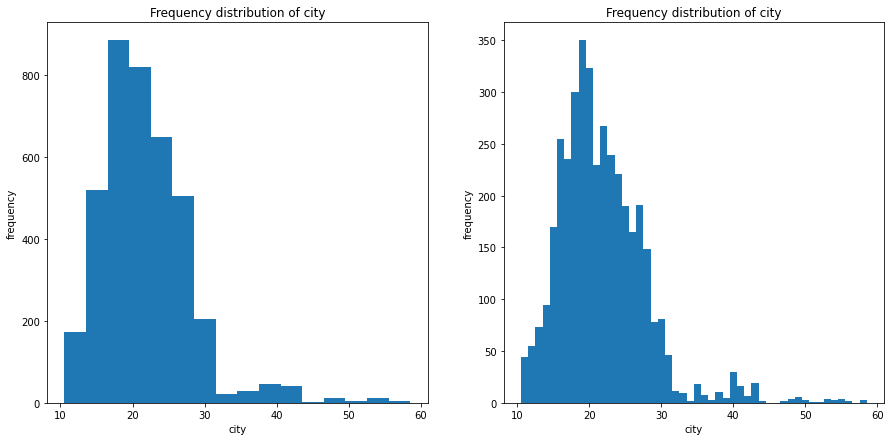

In [32]:
plt.figure(figsize = (15,7))

# create a subplot
plt.subplot(1,2,1)
# define the bin edges
bin_edges = np.arange(df.city.min(), df.city.max()+3, 3)
plt.hist(data=df, x='city', bins=bin_edges)
plt.xlabel('city')
plt.ylabel('frequency')
plt.title('Frequency distribution of city')

# create a subplot
plt.subplot(1,2,2)
# define the bin edges
bin_edges = np.arange(df.city.min(), df.city.max()+1, 1)
plt.hist(data=df, x='city', bins=bin_edges)
plt.xlabel('city')
plt.ylabel('frequency')
plt.title('Frequency distribution of city');

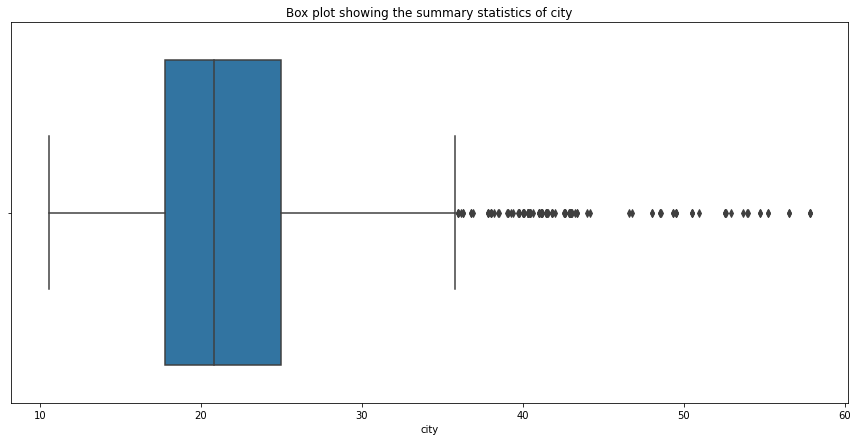

In [55]:
plt.figure(figsize=(15,7))
sb.boxplot(x = 'city', data = df)
plt.title('Box plot showing the summary statistics of city');

From the box plot above, there seems to be outliers from `35`. We can limit the axis to get a better view of the distribution of the data.

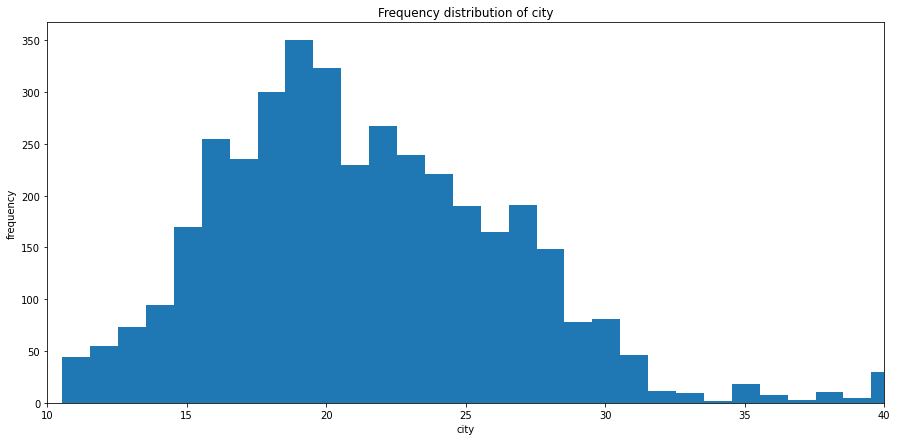

In [48]:
plt.figure(figsize = (15,7))
bin_edges = np.arange(df.city.min(), df.city.max()+1, 1)
plt.hist(data=df, x='city', bins=bin_edges)
plt.xlabel('city')
plt.ylabel('frequency')
plt.title('Frequency distribution of city')
plt.xlim(10,40);

The distribution of city seems to be unimodal and normally distributed. A lot of cars have a city measurement between 15 and 25 with most of them falling around 20.

#### Numerical Discrete Variables - ghgScore
When plotting histograms for discrete variables, the bin edges should be in between integers. Also, to give the idea that they are discrete, the bins should be spaced.

In [60]:
df.ghgScore.describe()

count    3929.000000
mean        5.659201
std         1.754589
min         1.000000
25%         5.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: ghgScore, dtype: float64

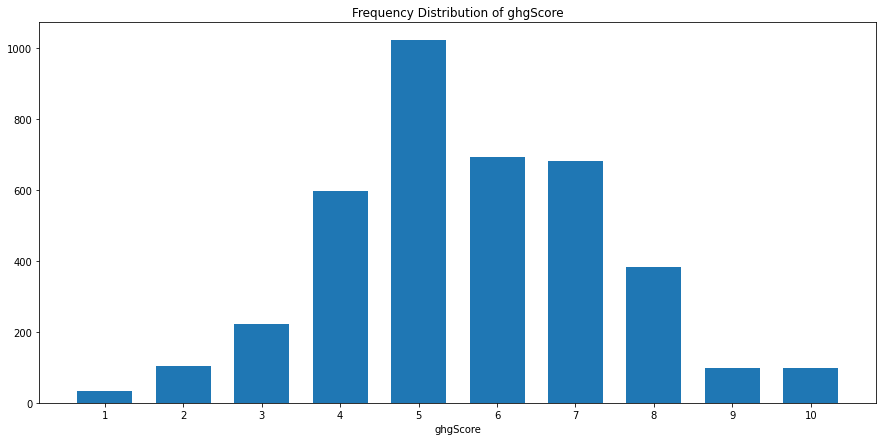

In [66]:
bin_edges = np.arange(0.5, 10.5+1, 1)
plt.figure(figsize=(15,7))
# the rwidth parameter is used to reduce the space taken up by the bin rectangles, this is to give an illusion of the space between bins
plt.hist(x='ghgScore', data=df, bins = bin_edges, rwidth=0.7)
plt.xlabel('ghgScore')
plt.title('Frequency Distribution of ghgScore')
plt.xticks(np.arange(1, 10+1, 1));

Most cars have a ghgScore between 4 and 7. Very few of them are scored excellent or poor.

### Bivariate Analysis
The goal of bivariate analysis is to explore the relationship between two variables
* **Numerical vs Numerical Variables**
    * scatter plots
* **Numerical vs Categorical Variables**
    * box plots
    * heat maps
* **Categorical vs Categorical Variables**
    * clustered bar charts

#### Numerical vs Numerical - city vs UCity
Scatter plots help us see the correlation between two numerical variables

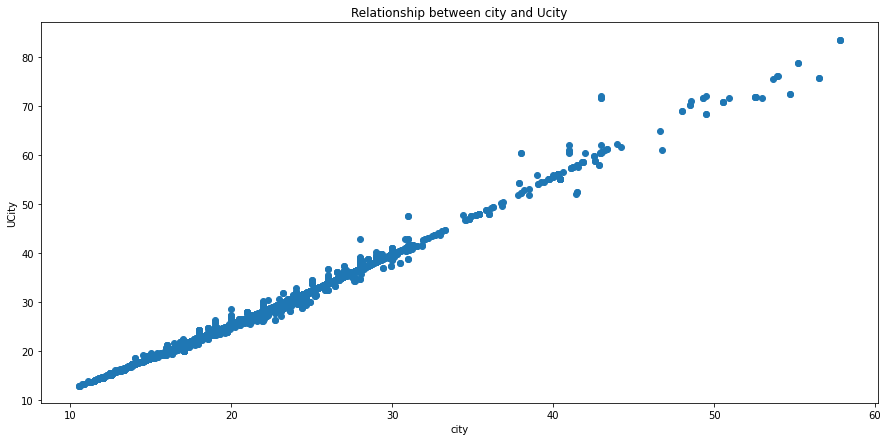

In [69]:
plt.figure(figsize=(15,7))
plt.scatter(x='city',y='UCity', data=df)
plt.xlabel('city')
plt.ylabel('UCity')
plt.title('Relationship between city and Ucity');

city has a strong positive correlation with UCity especially city values between 10 and 30 and UCity values between 10 and 40.

#### Numerical vs Categorical - VClass vs comb
How does comb vary across the different categories of the Vclass?

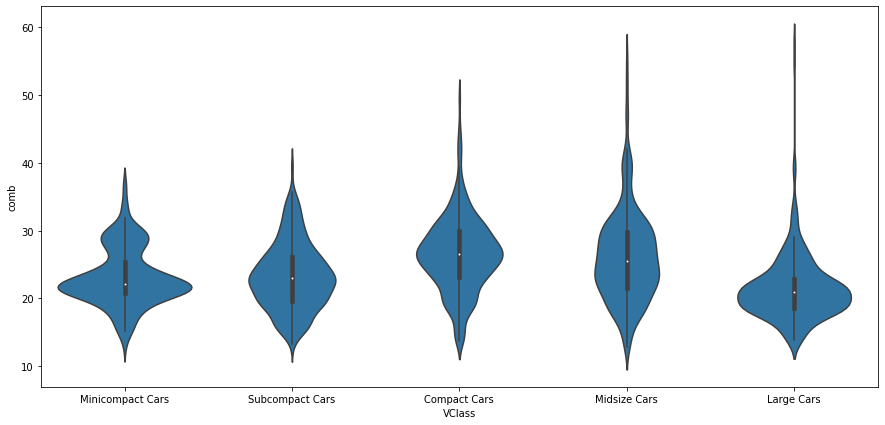

In [71]:
plt.figure(figsize=(15,7))
sb.violinplot(x='VClass', y='comb', data=df, color=base_color);

Most minicompat cars seem to take on comb values around 20 or 30. This seems to increase as the size of the vehicle increases up till Midsize cars. Large cars seem to take on low comb values.

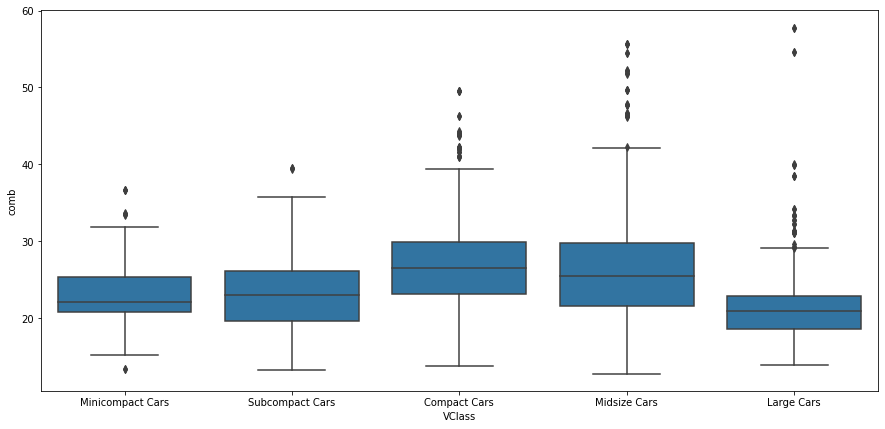

In [72]:
plt.figure(figsize=(15,7))
sb.boxplot(x='VClass', y='comb', data=df, color=base_color);

The Midsize and Compact cars seem to have a higher `comb` median compared to the other vehicle classes. Large cars generally have a lower comb compared to other classes.

#### Categorical vs Categorical - VClass vs fuelType

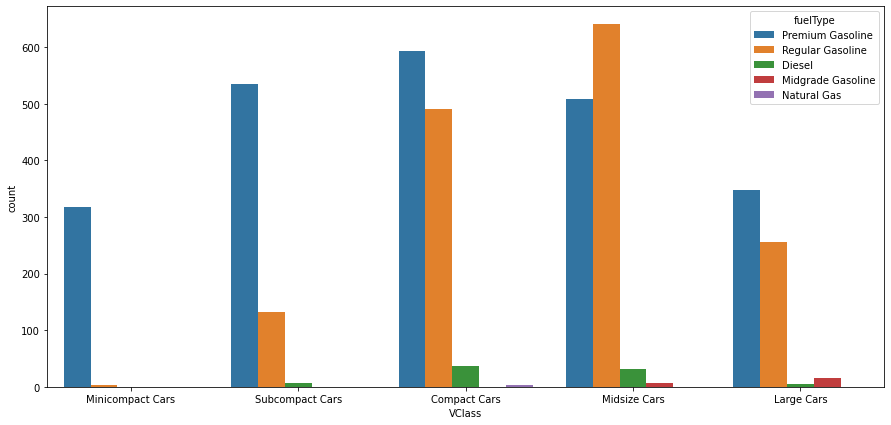

In [73]:
plt.figure(figsize=(15,7))
sb.countplot(x='VClass', data=df, hue='fuelType');

All cars use premium gasoline. Minicompact cars use only premium gasoline. Midsize cars use mostly regular gasoline. Only Midsize and Large cars use midgrade gasoline.